### 0. Imports

In [41]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import polars as pl

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Vigilar progreso bucles
# -----------------------------------------------------------------------
from tqdm import tqdm

# Gestionar los warnings
# -----------------------------------------------------------------------
import warnings

# modificar el path
# -----------------------------------------------------------------------
import sys
sys.path.append("..")

# importar funciones de soporte
# -----------------------------------------------------------------------
import src.soporte_eda as se
import src.soporte_preprocesamiento as sp

# evaluar objetos literales
# -----------------------------------------------------------------------
from ast import literal_eval 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 0.1 Functions under construction

In [42]:
def extract_value(col, key):
    # check if row is str. If it is parse as dict and extract key
    return col.apply(
        lambda x: literal_eval(x).get(key) if isinstance(x, str) else np.nan
    )

# 1. Importar datos

In [43]:
pd.set_option("display.max_columns",40)
rent_df = pd.read_csv("../datos/api_rent_madrid.csv",sep=";")
rent_df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.0,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,Madrid,Villamanrique de Tajo,es,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,False,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,Toledo,Recas,es,400.536.974,-39.912.159,False,47186,REDPISO alquila esta vivienda situada en el mu...,False,good,False,5.0,{'typology': 'flat'},"{'subtitle': 'Recas', 'title': 'Piso en Calle ...",False,False,False,False,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [44]:
pd.set_option("display.max_rows",40)
se.exploracion_dataframe(rent_df)

El número de datos es 450 y el de columnas es 38

 ..................... 

Las primeras filas del dataframe son:


,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN



 ..................... 

Los tipos de las columnas son:


,tipo_dato
propertyCode,int64
numPhotos,int64
price,float64
propertyType,object
operation,object
size,float64
exterior,bool
rooms,int64
bathrooms,int64
address,object



 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 8

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
description,0.222222
hasVideo,4.000000
status,4.000000
newDevelopment,4.000000
priceByArea,4.000000
detailedType,4.000000
suggestedTexts,4.000000
hasPlan,4.000000
has3DTour,4.000000
has360,4.000000



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROPERTYTYPE tiene 6 valores únicos, de los cuales los primeros son:


,count,pct
propertyType,,
flat,356,79.1
studio,48,10.7
duplex,19,4.2
penthouse,16,3.6
chalet,9,2.0


La columna OPERATION tiene 1 valores únicos, de los cuales los primeros son:


,count,pct
operation,,
rent,450,100.0


La columna ADDRESS tiene 405 valores únicos, de los cuales los primeros son:


,count,pct
address,,
"Calle Valle de Ambles, 2",10,2.2
El Quiñón,4,0.9
Calle de Sáhara,3,0.7
Calle de Honduras,3,0.7
Calle de Navalmoral de la Mata,2,0.4


La columna PROVINCE tiene 5 valores únicos, de los cuales los primeros son:


,count,pct
province,,
Madrid,358,79.6
Toledo,62,13.8
Guadalajara,21,4.7
Segovia,8,1.8
Ávila,1,0.2


La columna MUNICIPALITY tiene 96 valores únicos, de los cuales los primeros son:


,count,pct
municipality,,
Madrid,170,37.8
Alcalá de Henares,23,5.1
Seseña,14,3.1
Torrejón de Ardoz,14,3.1
Parla,14,3.1


La columna COUNTRY tiene 1 valores únicos, de los cuales los primeros son:


,count,pct
country,,
es,450,100.0


La columna LATITUDE tiene 433 valores únicos, de los cuales los primeros son:


,count,pct
latitude,,
404.430.651,10,2.2
403.809.876,2,0.4
402.003.307,2,0.4
405.126.166,2,0.4
400.493.725,2,0.4


La columna LONGITUDE tiene 433 valores únicos, de los cuales los primeros son:


,count,pct
longitude,,
-34.659.877,10,2.2
-36.338.528,2,0.4
-36.919.489,2,0.4
-33.694.194,2,0.4
-42.105.716,2,0.4


La columna DESCRIPTION tiene 427 valores únicos, de los cuales los primeros son:


,count,pct
description,,
"VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar con Qube! Alquila tu nueva casa en Torrejón de Ardoz SIN GASTOS DE AGENCIA, NI COMISIONES. Qube Torrejón es un residencial de obra nueva ubicado en Torrejón de Ardoz compuesto por 36 viviendas de Protección de Precio Limitado. Todas las viviendas cuentan con 2 dormitorios, 2 baños, trastero y 1 o 2 plazas de garaje incluido en el precio. El Precio NO incluye los gastos de comunidad, tasas e impuestos vinculados a la vivienda. El edificio cuenta con ascensor, servicio de conserjería, zonas comunes con piscina en mancomunidad, zona chill out en cubierta y sala gastrobar para que toda la familia pueda disfrutar de todas las comodidades que presentan las comunidades Qube. Las viviendas Qube llevan suelo radiante refrescante centralizado mediante aerotermia. Además, cuentan con la mayor calificación energética A con lo que se reduce el consumo energético y lo podrás comprobar en la factura de los consumos. Todos los pisos tienen cocina amueblada equipada con vitrocerámica de inducción, campana decorativa y horno. Los cuartos de baño cuentan con ducha y bañera, mampara, accesorios de baño, espejo y mueble. El resto de la vivienda no está amueblado. Además, las viviendas están dotadas de luminarias en la totalidad de las estancias. ¿Qué necesitas para poder disfrutar de una vivienda Qube? 1 mes de fianza Seguro de hogar a la firma de contrato. Contrato indefinido de más de 1 año de antigüedad. Si no cumples con esta condición se requerirá un avalista adicional. ¡IMPORTANTE! Qube Torrejón es una promoción de “Protección de Precio Limitado en Régimen de Alquiler”, por el decreto 74/2009, podrás optar por el piso que más te guste si cumples los requisitos de acceso de la Comunidad de Madrid, incluido uno de los disponibles adaptado para personas con movilidad que presenten su certificado de discapacidad. Si tienes cualquier duda acerca de las condiciones puedes visitar nuestra web o llamarnos, te responderemos encantados.",10,2.2
"Nuevo curso, nuevo hogar ¡con hasta 1 MES GRATIS y SIN COMISIÓN DE AGENCIA en tu alquiler! Amplia y luminosa vivienda de dos dormitorios, en un entorno tranquilo, con todos los servicios a tu alcance. *Es condición esencial permanecer en la vivienda al menos 12 meses, de no ser así la promoción quedará sin efectos con carácter retroactivo, viniendo obligado a devolver los importes mensuales de la promoción que se haya beneficiado ¡ALTA DE SUMINISTROS GRATIS! Disfruta de tu hogar desde el primer momento, Testa Home te ayuda en la gestión del alta de suministros de manera gratuita, con lo que podrás ahorrar hasta 330 € por el alta de la luz y el gas. *Para una vivienda con gasto promedio de 4,4 KWh ¡VIVIENDA DE DOS DORMITORIOS CON TERRAZA! Vivienda sin amueblar. Vivienda de dos dormitorios situado en Seseña, Toledo. Cocina amueblada con electrodomésticos. Suelos de tarima y armarios empotrados. Plaza de garaje y trastero incluidos en el precio. Posibilidad de alquiler de una segunda plaza de garaje por 40 euros mensuales para las viviendas sitas en Calle Rembrant. Situado en una urbanización compuesta por varios edificios que conforman una manzana semicerrada, con zonas mancomunadas. Disponen de jardines, piscina comunitaria, canchas deportivas en las que se pueden realizar varios tipos de deportes, zonas de juegos infantiles, además de accesos a garajes. Situado en un entorno tranquilo y con todos los servicios. Bien comunicado con transporte público autobús urbano y salidas a la A4 Y R4. ¡SÓLO SE PIDE 1 MES DE FIANZA Y ¡SIN COMISIÓN DE AGENCIA! No pagas los gastos de comunidad durante los primeros 3 años e IBI durante los primeros 2 años. Horario de atención telefónica de lunes a viernes de 9:00 a 21:00 y sábados de 9:00 a 14:00 horas. Consulte condiciones y disponibilidad. *Imágenes orientativas sin carácter vinculante. **Las imágenes corresponden a un apartamento tipo. **Viviendas sujetas a disponibilidad y viviendas no amueblada. Las prom

La columna HASVIDEO tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
hasVideo,,
False,314,69.8
True,118,26.2


La columna STATUS tiene 3 valores únicos, de los cuales los primeros son:


,count,pct
status,,
good,413,91.8
newdevelopment,17,3.8
renew,2,0.4


La columna NEWDEVELOPMENT tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
newDevelopment,,
False,415,92.2
True,17,3.8


La columna DETAILEDTYPE tiene 10 valores únicos, de los cuales los primeros son:


,count,pct
detailedType,,
{'typology': 'flat'},344,76.4
"{'typology': 'flat', 'subTypology': 'studio'}",46,10.2
"{'typology': 'flat', 'subTypology': 'penthouse'}",16,3.6
"{'typology': 'flat', 'subTypology': 'duplex'}",15,3.3
"{'typology': 'chalet', 'subTypology': 'terracedHouse'}",5,1.1


La columna SUGGESTEDTEXTS tiene 395 valores únicos, de los cuales los primeros son:


,count,pct
suggestedTexts,,
"{'subtitle': 'Suroeste, Torrejón de Ardoz', 'title': 'Piso en Calle Valle de Ambles, 2'}",10,2.2
"{'subtitle': 'El Quiñón, Seseña', 'title': 'Piso'}",4,0.9
"{'subtitle': 'Los Rosales, Madrid', 'title': 'Piso en Calle de Sáhara'}",3,0.7
"{'subtitle': 'Las Sedas - El Olivar, Alcalá de Henares', 'title': 'Piso en Calle de Honduras'}",3,0.7
"{'subtitle': 'Cabañas de la Sagra', 'title': 'Piso'}",2,0.4


La columna HASPLAN tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
hasPlan,,
False,296,65.8
True,136,30.2


La columna HAS3DTOUR tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
has3DTour,,
False,426,94.7
True,6,1.3


La columna HAS360 tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
has360,,
False,345,76.7
True,87,19.3


La columna HASSTAGING tiene 1 valores únicos, de los cuales los primeros son:


,count,pct
hasStaging,,
False,432,96.0


La columna SUPERTOPHIGHLIGHT tiene 1 valores únicos, de los cuales los primeros son:


,count,pct
superTopHighlight,,
False,432,96.0


La columna TOPNEWDEVELOPMENT tiene 1 valores únicos, de los cuales los primeros son:


,count,pct
topNewDevelopment,,
False,432,96.0


La columna EXTERNALREFERENCE tiene 335 valores únicos, de los cuales los primeros son:


,count,pct
externalReference,,
CG-91792-0001,2,0.4
"3,80811E+11",2,0.4
VT02,2,0.4
VT07,2,0.4
VT3,2,0.4


La columna FLOOR tiene 13 valores únicos, de los cuales los primeros son:


,count,pct
floor,,
1,95,21.1
2,77,17.1
bj,68,15.1
3,60,13.3
4,36,8.0


La columna DISTRICT tiene 96 valores únicos, de los cuales los primeros son:


,count,pct
district,,
Centro,48,10.7
Villaverde,23,5.1
Puente de Vallecas,17,3.8
El Quiñón,13,2.9
Tetuán,13,2.9


La columna NEIGHBORHOOD tiene 74 valores únicos, de los cuales los primeros son:


,count,pct
neighborhood,,
Lavapiés-Embajadores,11,2.4
Villaverde Alto,9,2.0
Valdeacederas,8,1.8
San Diego,8,1.8
Los Rosales,7,1.6


La columna HASLIFT tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
hasLift,,
True,234,52.0
False,185,41.1


La columna PARKINGSPACE tiene 5 valores únicos, de los cuales los primeros son:


,count,pct
parkingSpace,,
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",136,30.2
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",1,0.2
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",1,0.2
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",1,0.2
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",1,0.2


La columna LABELS tiene 1 valores únicos, de los cuales los primeros son:


,count,pct
labels,,
"[{'name': 'apartamentoType', 'text': 'Apartamento'}]",30,6.7


La columna NEWDEVELOPMENTFINISHED tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
newDevelopmentFinished,,
True,12,2.7
False,5,1.1


From a quick first data types and column value inspection, we observe:

**Low variability columns**
- operation: A single value column. Should be dropped as it adds no variance.
- Country: A single value column. Should be dropped as it adds no variance.
- Status: The most frequent category has a 91.8% of observations. The second just 3.8% meaning 17 observations, which would leave very little room for an algorithm to have a significant sample for that second category. It is better dropped.
- newDevelopment: Same as Status.
- detailedtype: Most flats (76.4%) do not posses a subTypology. Thus, it is the same as having 76.4% NaN values.
- has3DTour: With just 6 samples for the binary minority class, it brings no information.
- hasStaging: A single value column. Should be dropped as it adds no variance.
- superTopHighlight: A single value column. Should be dropped as it adds no variance.
- topNewDevelopment: A single value column. Should be dropped as it adds no variance.


In [45]:
rent_df.drop(columns=["operation","country","status", "newDevelopment",
                      "detailedType","has3DTour","hasStaging","superTopHighlight",
                      "topNewDevelopment"],inplace=True)




**Duplicates**
- There are 8 row level duplicates in the dataset.


In [46]:
rent_df.drop_duplicates(inplace=True)

- There are other suposed unique values, such as the description or latitude, longitude that are duplicaded, which is worth inspecting:

In [47]:
rent_df[rent_df.duplicated(subset="description",keep=False)].head(4)

,propertyCode,numPhotos,price,propertyType,size,exterior,rooms,bathrooms,address,province,municipality,latitude,longitude,showAddress,distance,description,hasVideo,priceByArea,suggestedTexts,hasPlan,has360,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
53,98708163,13,650.0,flat,70.0,True,2,1,jerez,Toledo,Calypo Fado,40.247.822,-4.060.189,False,35607,"piso azul inmobiliaria alquila en calypo fado,...",False,9.0,"{'subtitle': 'Calypo Fado', 'title': 'Piso en ...",False,False,NaN,1,NaN,NaN,False,NaN,NaN,NaN
55,98715256,13,650.0,flat,70.0,True,2,1,jerez,Toledo,Calypo Fado,402.449.057,-40.682.374,False,36358,"piso azul inmobiliaria alquila en calypo fado,...",False,9.0,"{'subtitle': 'Calypo Fado', 'title': 'Piso en ...",False,False,NaN,1,NaN,NaN,False,NaN,NaN,NaN
78,98932280,20,650.0,flat,55.0,True,1,1,barrio Rejas,Madrid,Madrid,404.415.556,-35.836.227,False,10495,LEER TEXTO COMPLETO Apartamento totalmente amu...,False,12.0,"{'subtitle': 'Rejas, Madrid', 'title': 'Piso'}",False,False,11DEY750/11,4,San Blas,Rejas,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'apartamentoType', 'text': 'Apartame...",NaN
85,98931699,20,650.0,flat,55.0,True,1,1,barrio Rejas,Madrid,Madrid,404.414.556,-35.860.227,False,10296,LEER TEXTO COMPLETO Apartamento totalmente amu...,False,12.0,"{'subtitle': 'Rejas, Madrid', 'title': 'Piso'}",False,False,10DEY750/10,4,San Blas,Rejas,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'apartamentoType', 'text': 'Apartame...",NaN


It seems that except for the property code, records sharing the same description are in fact duplicated and should thus be dropped.

In [48]:
rent_df.drop_duplicates(subset="description",keep="first", inplace=True)

**Missing values**

Most columns have a 4% of missing values that should be treated. The following have more than 5% but less than 50% and could be interesting to keep in abscence of other errors:
- floor
- district
- hasLift

The following columns should be dropped due to high volume of missing values:
- neighborhood
- labels
- newDevelopmentFinished

In [49]:
rent_df.drop(columns=["neighborhood","labels","newDevelopmentFinished"],inplace=True)

The column 'parkingSpace' has above 68% of missing values, but this one being almost binary could be kept. Missing values could be kept as 'unknown', replacing a False value, as most non-missing values are True, in case it brings useful information. This is to be contrasted in subsequent steps.

In [50]:
# use pd.categorical as .astype("category") raises errors
rent_df["parkingSpace_included_in_listing"] = pd.Categorical(np.where(extract_value(rent_df['parkingSpace'], 'isParkingSpaceIncludedInPrice') == True,1,0))
rent_df.drop(columns="parkingSpace",inplace=True)

### Boolean columns values

Explore values from boolean columns:

In [51]:
for column in rent_df.select_dtypes(bool):
    
    display(rent_df[column].value_counts())

exterior
True     347
False     81
Name: count, dtype: int64

showAddress
False    333
True      95
Name: count, dtype: int64

A priori, everything is in order.

### Categorical columns values
**High cardinality**
- Description: For obvious reasons. Some characteristics could be extracted, such as wether the rental unit includes furniture or not. Do not drop for now.
- SuggestedTexts: High cardinality, possible does not add any value. Drop.
- externalReference: High cardinality, possible does not add any value as it looks like an id column. Drop.
- address: it quite possibly adds no value. Leave for now in case it can serve the purpose of getting proxy variables if the model needs it.


In [52]:
rent_df.drop(columns=["suggestedTexts","externalReference"], inplace=True)

**Data types and errors**

- Latitude & Longitude: Object data types are incorrect due to typo in the coordinates. Should be float.


In [53]:
rent_df["latitude"] = rent_df["latitude"].str.replace(".","").str[:7].astype(int) / 10**5
rent_df["longitude"] = rent_df["longitude"].str.replace(".","").str[:7].astype(int) / 10**5

- HasVideo: should be boolean.
- hasPlan to has360: Should be boolean.
- hasLift: should be boolean

In [54]:
rent_df[["hasVideo","hasPlan","has360","hasLift"]] = rent_df[["hasVideo","hasPlan","has360","hasLift"]].astype(bool)

- floor: although categorical, should be in numeric format. Assuming "bj" = "bajo", "en" = "entresuelo", "st" = "sotano" and "ss" = "semisotano", then:

In [55]:
floor_replacement_dict = {
    "bj": 0,     # bajo 
    "en": 0.5,   # entresuelo
    "st": -1,    # sótano 
    "ss": -0.5   # semisótano 
}

rent_df["floor"] = rent_df["floor"].replace(floor_replacement_dict).astype("category")

###

Additional concerns like category underrepresentation will be addressed after further EDA and data understanding.

### Numerical columns

For numerical columns, the quickest way to assess value ranges and other statistics is through a descriptive summary:

In [56]:
rent_df.describe().T

,count,mean,std,min,25%,50%,75%,max
propertyCode,428.0,9.447580e+07,1.418609e+07,666696.00000,9.752670e+07,9.866600e+07,9.889510e+07,9.893968e+07
numPhotos,428.0,2.188551e+01,9.735542e+00,0.00000,1.500000e+01,2.100000e+01,2.800000e+01,7.200000e+01
price,428.0,6.726963e+02,8.499649e+01,340.00000,6.400000e+02,7.000000e+02,7.400000e+02,7.500000e+02
size,428.0,6.779673e+01,3.636241e+01,20.00000,4.600000e+01,6.150000e+01,8.000000e+01,3.710000e+02
rooms,428.0,1.693925e+00,9.857346e-01,0.00000,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
bathrooms,428.0,1.193925e+00,4.298690e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,428.0,4.030558e+01,1.766794e+00,4.03751,4.030286e+01,4.040550e+01,4.048334e+01,4.090739e+01
longitude,428.0,-3.682008e+00,3.205519e-01,-4.33449,-3.776485e+00,-3.696145e+00,-3.604645e+00,-3.577900e-01
distance,428.0,2.229495e+04,1.720615e+04,183.00000,6.991000e+03,1.963150e+04,3.516600e+04,5.991900e+04
priceByArea,412.0,1.201699e+01,5.421611e+00,1.00000,8.000000e+00,1.100000e+01,1.500000e+01,3.300000e+01


No presence of outliers is detected judging from the ranges of features like price, size and distance.

PropertyCode should be dropped, as it is just an ID column with no predictive power and no potential use.

In [57]:
rent_df.drop(columns="propertyCode", inplace=True)

Price shows a healthy range of values with no odd numbers (negative, 999 format, etc) within range that could encode missing values.

Rooms and bathroom probably should not be treated as numerical as they probably have very few unique values:


In [58]:
print(f"Rooms has {rent_df.rooms.nunique()} values. Bathrooms has {rent_df.bathrooms.nunique()}.")

# convert to category
rent_df["rooms"] = rent_df["rooms"].astype("category")
rent_df["bathrooms"] = rent_df["bathrooms"].astype("category")

Rooms has 6 values. Bathrooms has 3.



Appart from that, there is the minimum price by area of 1 euro, that looks suspiciously low. Let's check it:

In [59]:
rent_df[["price","size","address","municipality","priceByArea"]].sort_values("priceByArea").head(3)

,price,size,address,municipality,priceByArea
0,550.0,371.0,Numancia de la Sagra,Numancia de la Sagra,1.0
415,750.0,341.0,sexta bandera,Las Ventas de Retamosa,2.0
296,600.0,180.0,Meco,Meco,3.0


It actually looks like 'priceByArea' has correct values, except from the fact that they should be float values. Recalculating it:

In [60]:
rent_df["priceByArea"] = rent_df["price"] / rent_df["size"]

All other values present healthy ranges. The only feature that raises an eyebrow is distance, as it is not quite clear with respect to what that distance is measured. So let's check to what other feature's values its minimum values correspond:

In [61]:
rent_df[["address","municipality","distance"]].sort_values("distance").head(2)

,address,municipality,distance
133,"Calle Carretas, 31",Madrid,183
154,"Calle de Atocha, 51",Madrid,470


The shortest distance corresponds to Calle Carretas, 31. A quick google look up returns that it is close to "Kilometer 0" in Puerta del Sol, and the distance coincides with 183m. 

This distance measure is rather brute, and probably not as informative as the median price of living in certain districts or streets as it informs merely about distance to the center of Madrid. However, let's keep it for now to analyse it via due EDA.

# 2. EDA

### Custom questions to answer during EDA

Appart from the unavoidable questions about univariate feature distribution and feature relationships

**Geography of study**

Should I just keep appartments in Madrid? Or just in the municipality of madrid?

**Category representation**

What cateogries should be grouped? Should some be left out?
- PropertyType: Make groupings? Leave out underrepresented categories? 

**Description data extraction**

Are there useful characteristics in the description field?

**Interaction between lift, floor and price**

**Distance as price informative**

Is it a good measure to inform price? Could we use latitude and longitude to get better proxies such as facilities around (schools, supermarkets, activites, etc), median income of the district/street or living desirability levels of the surrounding area.

### Univariate distributions

In [62]:
visualizador = sp.Visualizador(rent_df.drop(columns=["latitude","longitude","description","address"]))

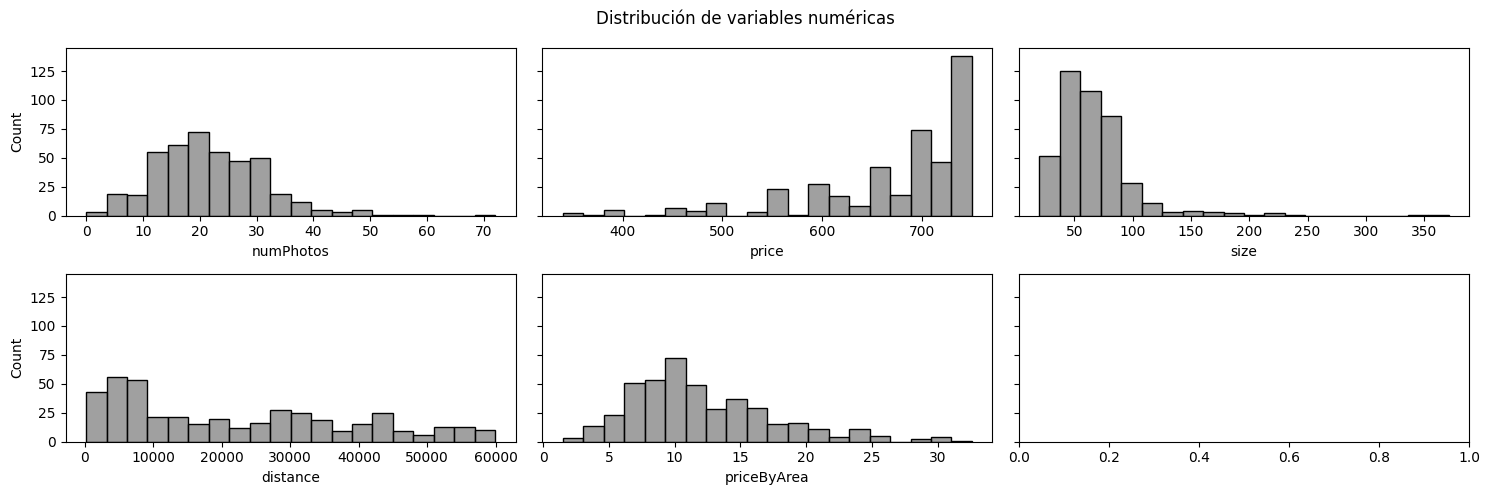

In [63]:
visualizador.plot_numericas()

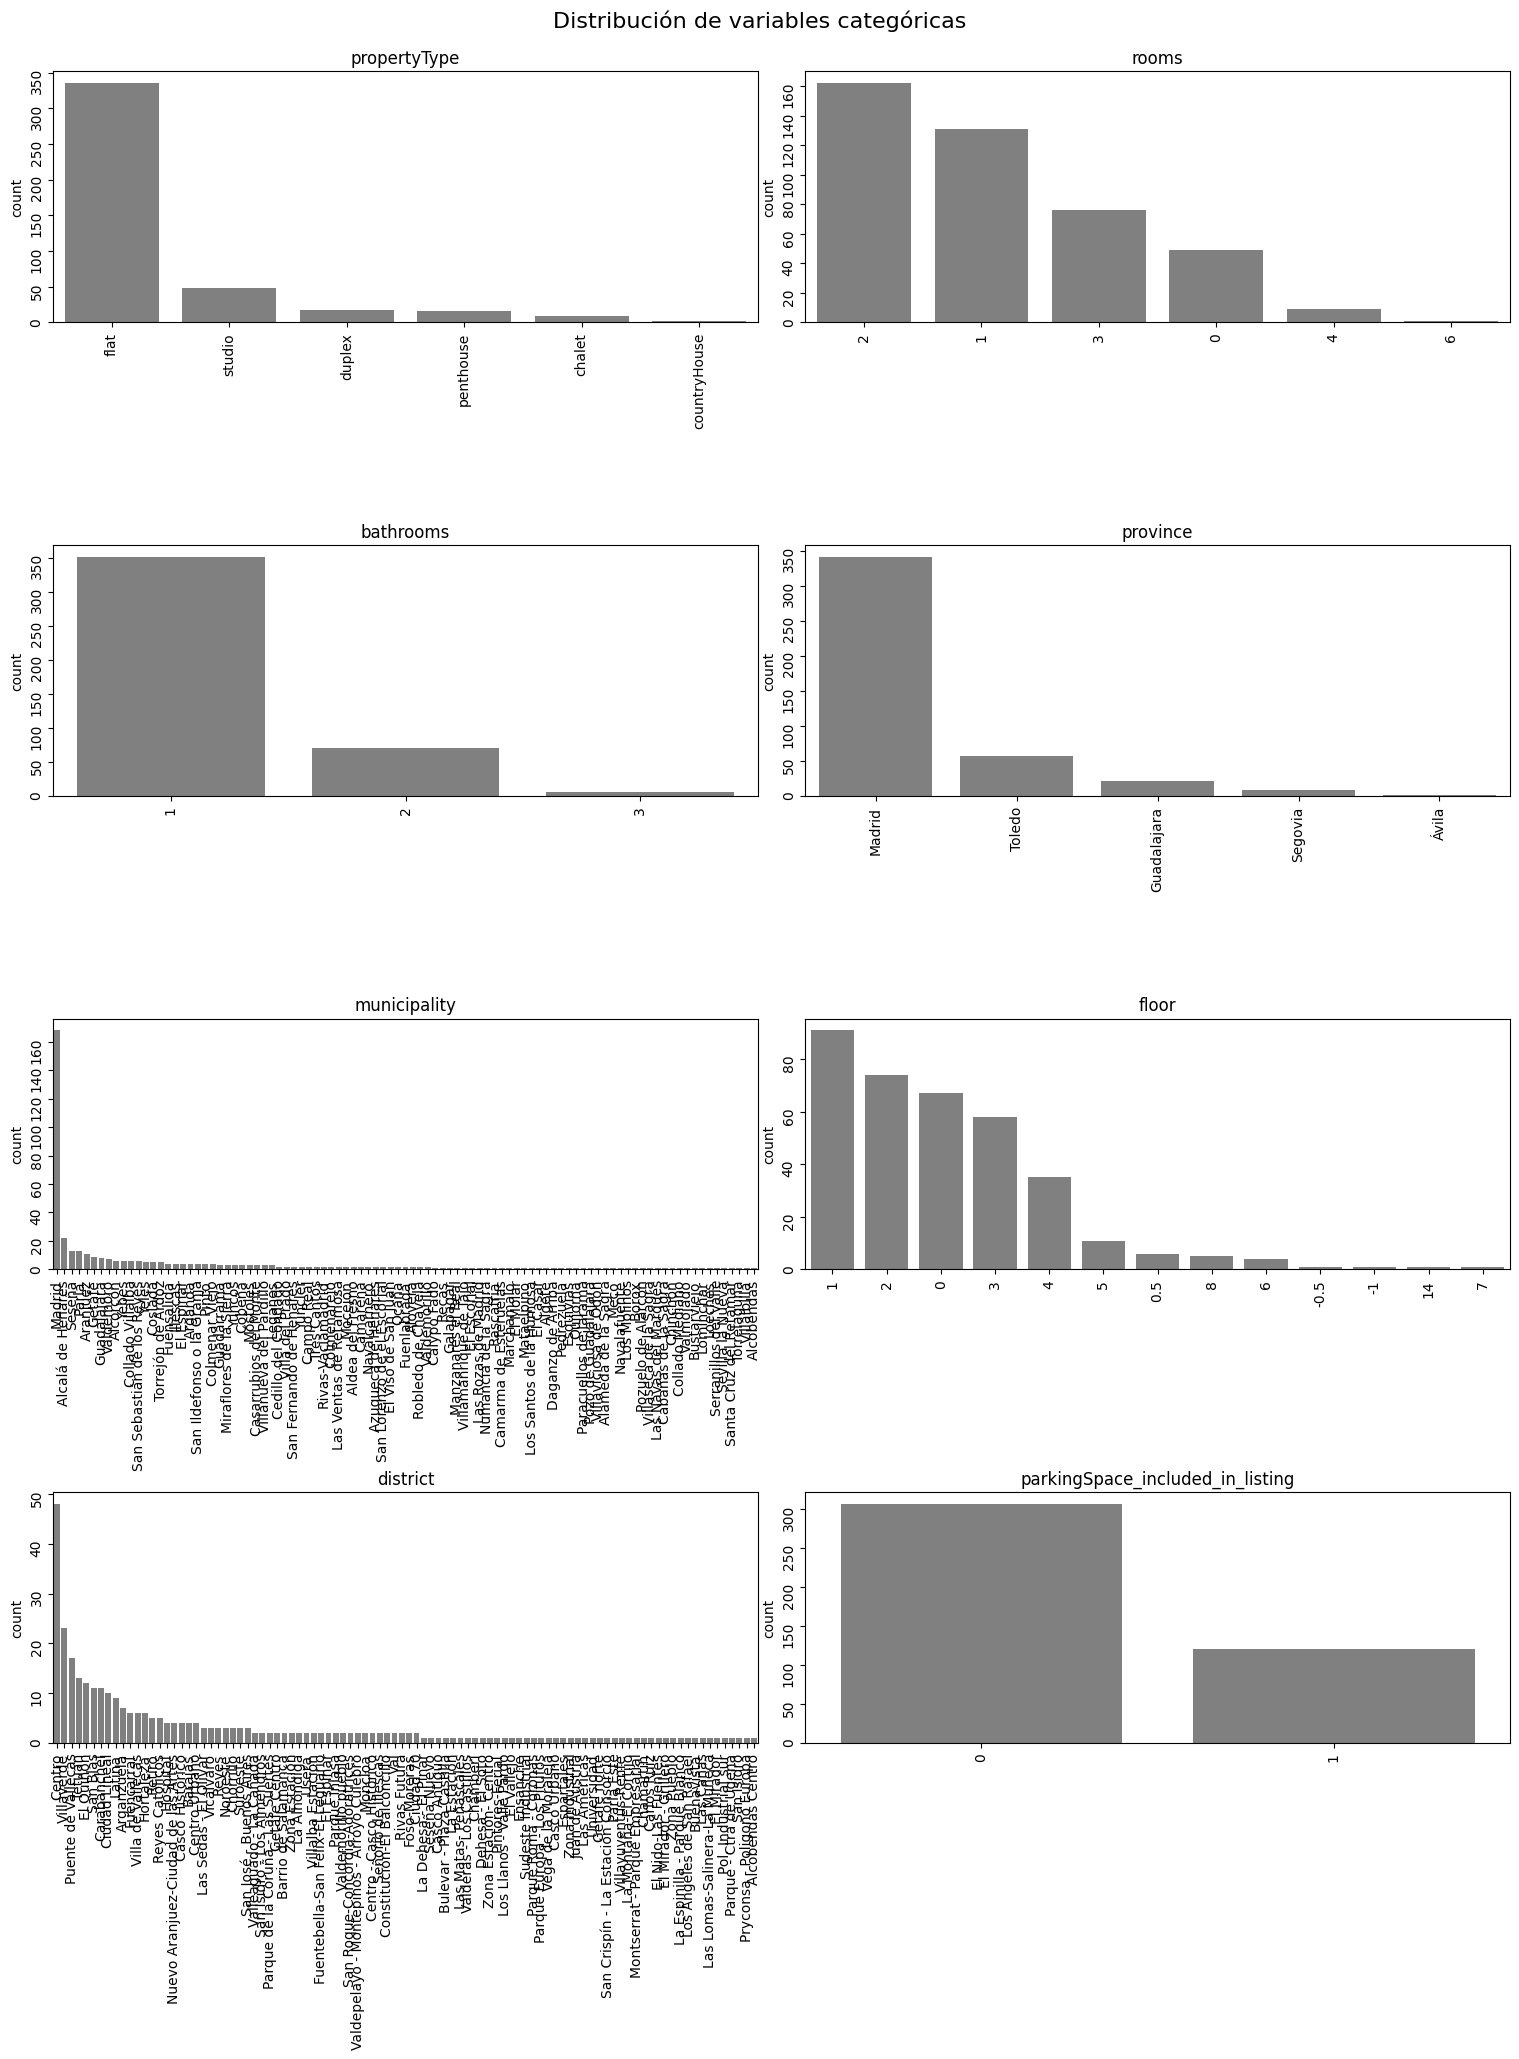

In [64]:
visualizador.plot_categoricas(tamano_grafica=(15, 20))